# 06_01_plot_Spectro

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [43]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-09-04 16:23:37 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 5.15.0 119 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 scipy      1.14.1
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [44]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u
#from astropy.stats import sigma_clip
#from ccdproc import combine, ccd_process, CCDData
from astropy.io import fits
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

"CAL-BDF" 폴더 찾기

In [45]:
#%%
BASEDIR = Path("/mnt/Rdata/OBS_data") 
PROJECDIR = BASEDIR/ "2024-Spectra"
TODODIR = PROJECDIR / "TEC140_ASI183MMPro_2024-05_1bin"
# TODODIR = PROJECDIR / "_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"


DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

MASTERDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
MASTERDIR = Path(MASTERDIR[0]) / _astro_utilities.master_dir
print ("MASTERDIR: ", format(MASTERDIR))

BDFDIR = [x for x in DOINGDIRs if "SPTR-CAL_" in str(x)]
print ("BDFDIR: ", format(BDFDIR))

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
DOINGDIRs = sorted([x for x in DOINGDIRs if not "SPTR-CAL_" in str(x)])
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = '2024-08-30'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro

## light Summary

In [46]:
for DOINGDIR in DOINGDIRs[:3] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    summary = yfu.make_summary(DOINGDIR/"reduced" / "*.fit*")
    if summary is not None : 
        #print(summary)
        print("len(summary):", len(summary))
        print("summary:", summary)
        #print(summary["file"][0])

DOINGDIR /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin
All 51 keywords (guessed from /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP24608-CAPELA_LIGHT__2024-04-26-12-11-33_5sec_TEC140_ASI183MMPro_-20c_1bin.fit) will be loaded.
len(summary): 62
summary:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  80732160    True   
1   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  80732160    True   
2   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  80732160    True   
3   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  80732160    True   
4   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  80732160    True   
..                                                ...       ...     ...   
57  /mnt/Rdata/OBS_data/2024-Spec

### 분광 자료 display



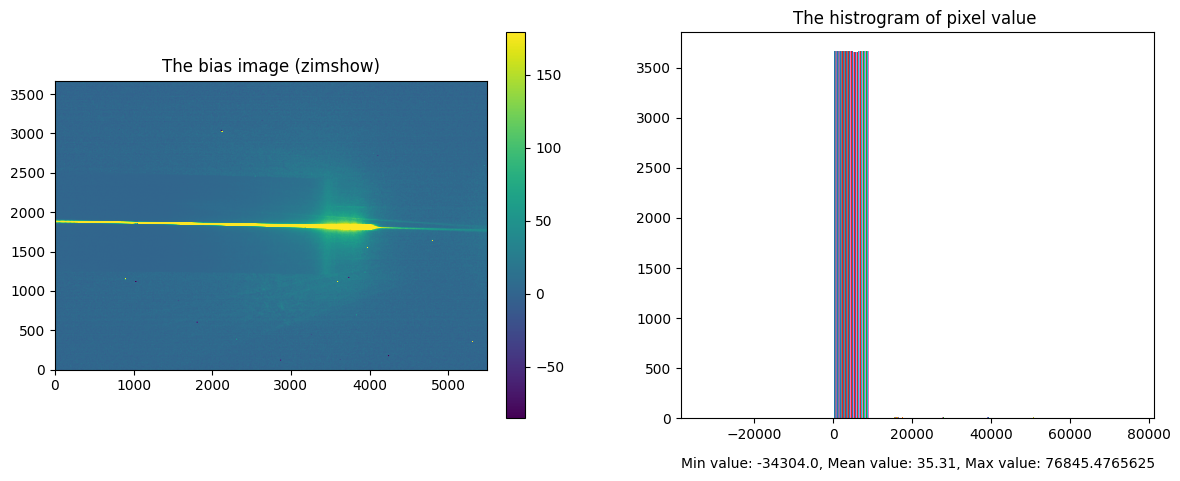

In [47]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], 
                    hdul[0].data,
                    origin="lower",
                    cmap = "viridis"
                    )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image (zimshow)')
axs[1].set_title('The histrogram of pixel value ')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

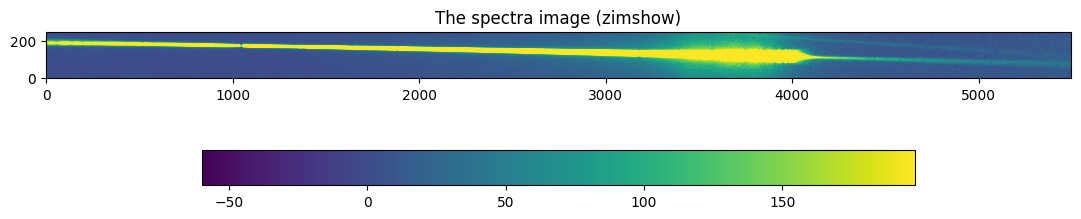

In [48]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                hdul[0].data[1700:1950, :],
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

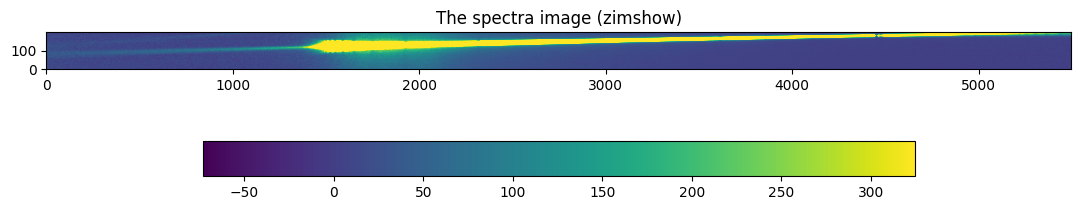

In [49]:
fpath = Path(summary["file"][3])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                np.flip(hdul[0].data[1700:1900, :], axis=1), # flip horizental
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

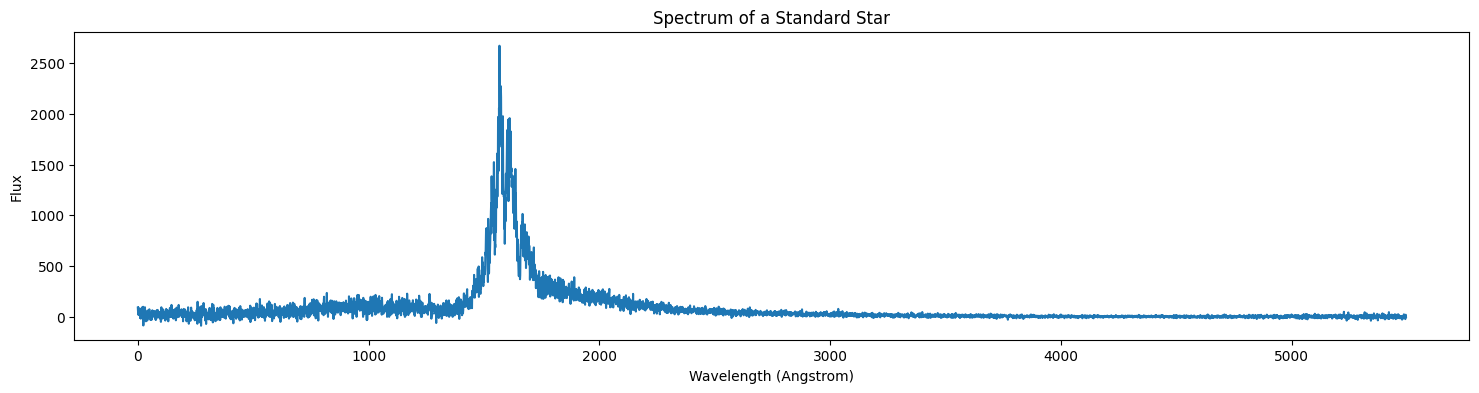

In [50]:
import matplotlib.pyplot as plt
from astropy.io import fits

plt.figure(figsize=(18, 4))  
data = np.flip(hdul[0].data[1800:1950, :], axis=1)
header = hdul[0].header

# 필요한 데이터 추출
wavelength = data[0,:]
flux = data[1]

# 플롯 생성
plt.plot(flux)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Spectrum of a Standard Star')
plt.show()

# Step 1: Examine the spectrum

https://github.com/astropy/astropy-tutorials/blob/main/tutorials/SpectroscopicDataReductionBasics/1-SpectroscopicTraceTutorial.ipynb

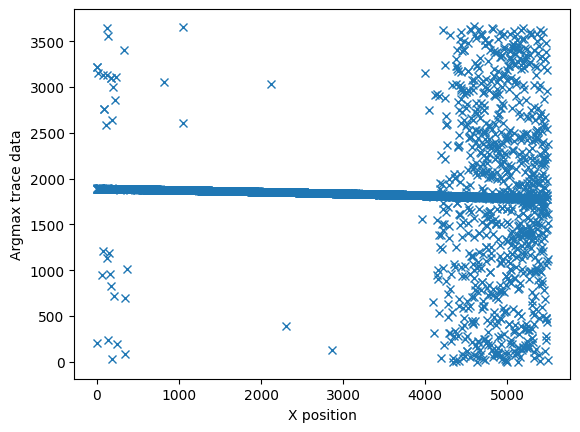

In [51]:
yvals = np.argmax(hdul[0].data, axis=0)
xvals = np.arange(hdul[0].data.shape[1])

plt.plot(xvals, yvals, 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

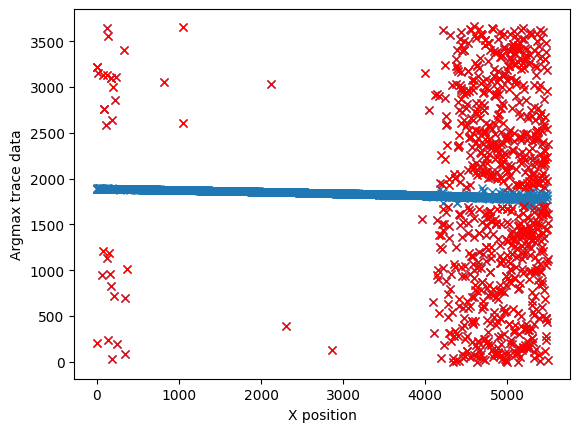

In [52]:
ylow, yhigh = 1700, 1900 
bad_pixels = (yvals < ylow) | (yvals > yhigh)

plt.plot(xvals, yvals, 'x')
plt.plot(xvals[bad_pixels], yvals[bad_pixels], 'rx')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");


Text(0.5, 0, 'X position')

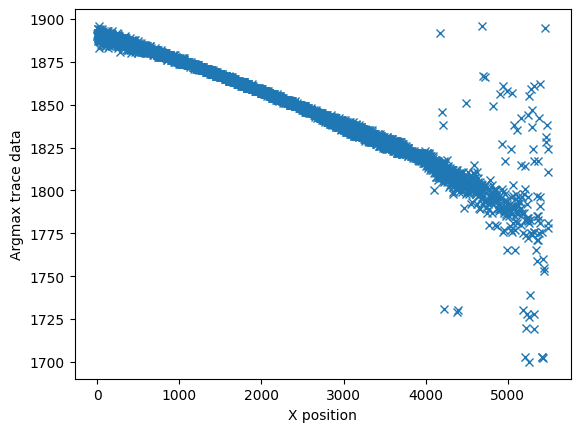

In [53]:
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position") 

Text(0.5, 0, 'X position')

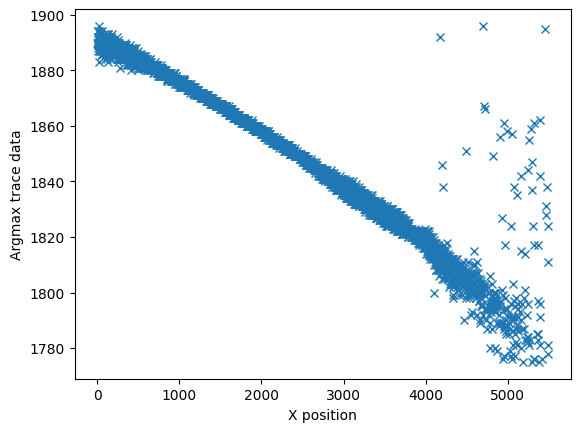

In [54]:
ylow, yhigh = 1775, 1900 
bad_pixels = (yvals < ylow) | (yvals > yhigh)

plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position")

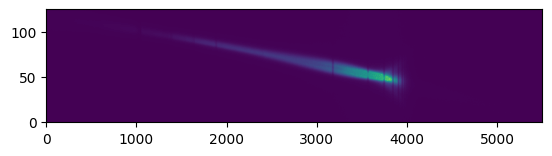

In [55]:
plt.imshow(hdul[0].data[ylow:yhigh, :],
           origin="lower")
plt.gca().set_aspect(10)

## Step 2b: Use moment analysis to extract a spine to trace


In [56]:
# we use a cutout around the traced line, so the Y-values are from that cutout
# the `repeat` command here is used to extend our Y-axis position values, which are 425, 426, ... 475
# along the X-direction.  The indexing with [:, None] adds a "dummy" axis along the second (x) dimension,
# then `repeat` copies our Y-axis values.  The resulting array has the same shape as our weight array,
# which is hdul[0].data[425:475, :] minus the median
yaxis = np.repeat(np.arange(ylow, yhigh)[:,None],
                  hdul[0].data.shape[1], axis=1)
background = np.median(hdul[0].data)
# moment 1 is the data-weighted average of the Y-axis coordinates
weighted_yaxis_values = np.average(yaxis, axis=0,
                                   weights=hdul[0].data[ylow:yhigh,:] - background)
print("weighted_yaxis_values ", weighted_yaxis_values)
print("weighted_yaxis_values.shape :", weighted_yaxis_values.shape)

weighted_yaxis_values  [1893.31713482 1901.8708505  1897.435577   ... 1808.01106889 1834.09807236
 1826.92518837]
weighted_yaxis_values.shape : (5496,)


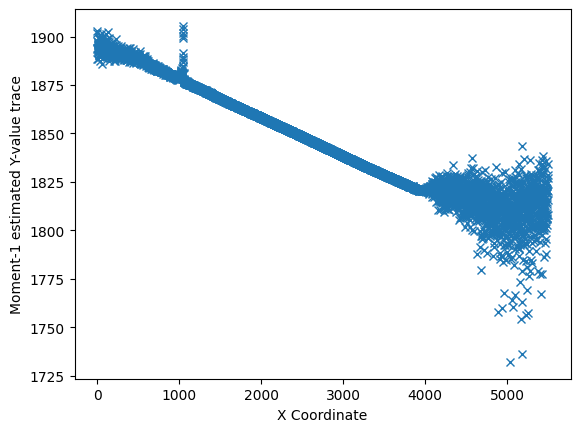

In [57]:
plt.plot(xvals, weighted_yaxis_values, 'x')
plt.xlabel("X Coordinate")
plt.ylabel("Moment-1 estimated Y-value trace");

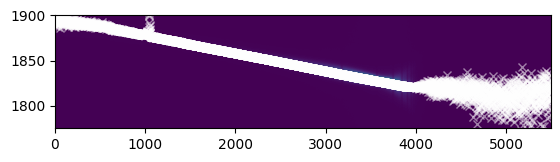

In [58]:
# we need to use the 'extent' keyword to have the axes correctly labeled
plt.imshow(hdul[0].data[ylow:yhigh,:],
          extent=[0,hdul[0].data.shape[1],ylow,yhigh],
          origin="lower")
plt.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
plt.plot(xvals, weighted_yaxis_values, 'wx', alpha=0.5)
plt.axis((0,hdul[0].data.shape[1],ylow,yhigh));

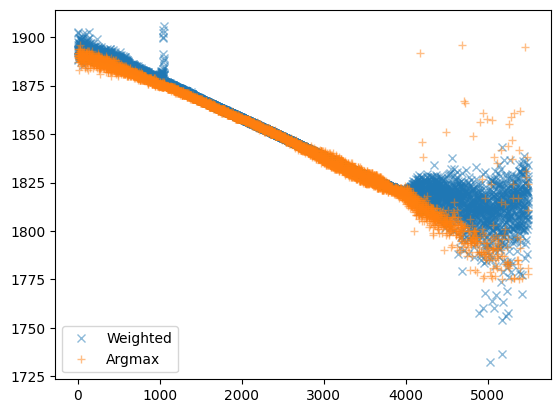

In [59]:
plt.plot(xvals, weighted_yaxis_values, 'x', label="Weighted", alpha=0.5)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
plt.legend(loc='best');

In [60]:
wei_ylow, wei_yhigh = 1775, 1875
bad_moments = (weighted_yaxis_values > wei_yhigh) | (weighted_yaxis_values < wei_ylow)

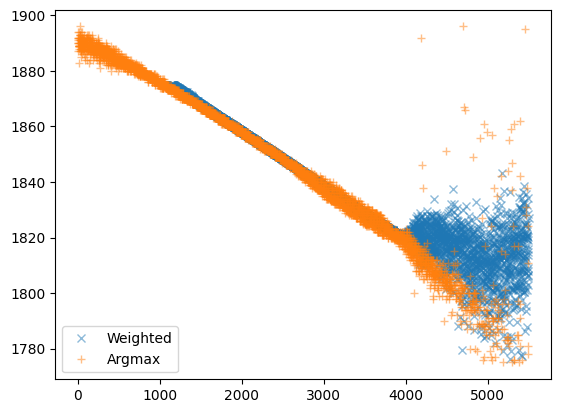

In [61]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', label="Weighted", alpha=0.5)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
plt.legend(loc='best');

	
## Step 3. Fit the trace profile

In [62]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter, LevMarLSQFitter

In [63]:
# We fit a 2nd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
# linfitter = LevMarLSQFitter()
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
fitted_polymodel

<Polynomial1D(2, c0=1910.43824044, c1=-0.03122893, c2=0.00000231)>

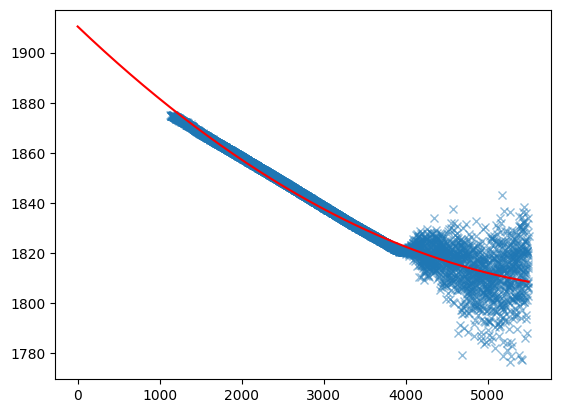

In [64]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');

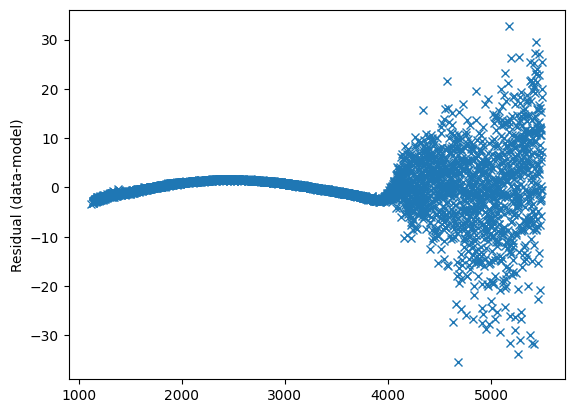

In [65]:
plt.plot(xvals[~bad_moments],
        weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
plt.ylabel("Residual (data-model)");

fitted_polymodel : Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                   c1          ...           c3          
    ------------------ --------------------- ... ----------------------
    1910.4382392821367 -0.031228930843555883 ... 4.9624001880793056e-17


 [astropy.modeling.fitting]


<Polynomial1D(3, c0=1910.43823928, c1=-0.03122893, c2=0.00000231, c3=0.)>

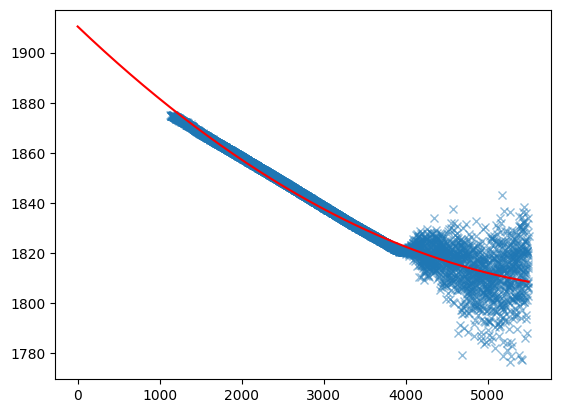

In [66]:
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
print("fitted_polymodel :", fitted_polymodel)

plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');
fitted_polymodel

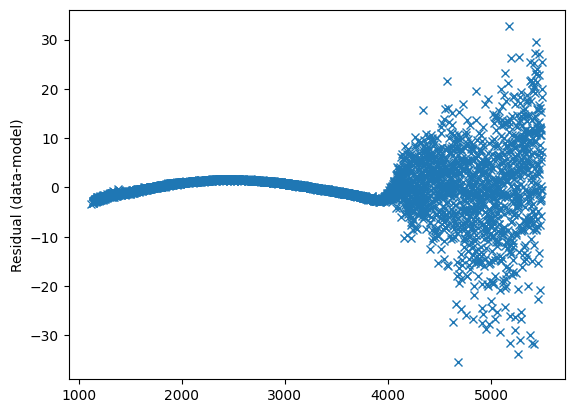

In [67]:
plt.plot(xvals[~bad_moments],
        weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
plt.ylabel("Residual (data-model)");

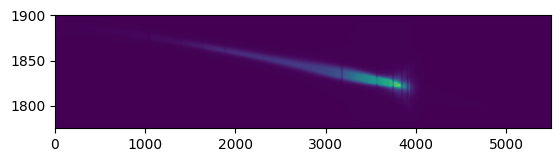

In [68]:
plt.imshow(hdul[0].data[ylow:yhigh,:],
          extent=[0,hdul[0].data.shape[1],ylow,yhigh],
          origin="lower")
plt.gca().set_aspect(10);

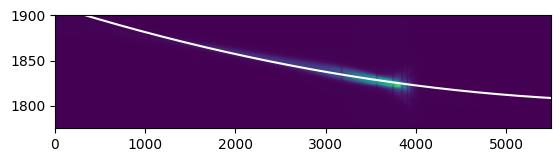

In [69]:
plt.imshow(hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
           origin="lower")
plt.gca().set_aspect(10)
plt.plot(xvals, fitted_polymodel(xvals), 'w')
plt.axis((0,hdul[0].data.shape[1],ylow,yhigh));

 [astropy.modeling.fitting]


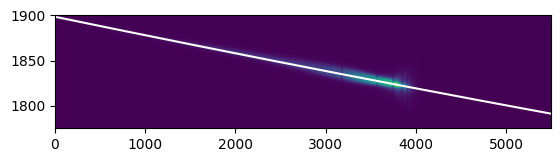

In [70]:
xhigh = 4000
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[(~bad_moments) & (xvals < xhigh)],
                             weighted_yaxis_values[(~bad_moments) & (xvals < xhigh)])
fitted_polymodel

plt.imshow(hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
           origin="lower")
plt.gca().set_aspect(10)
plt.plot(xvals, fitted_polymodel(xvals), 'w')
plt.axis((0,hdul[0].data.shape[1],ylow,yhigh));

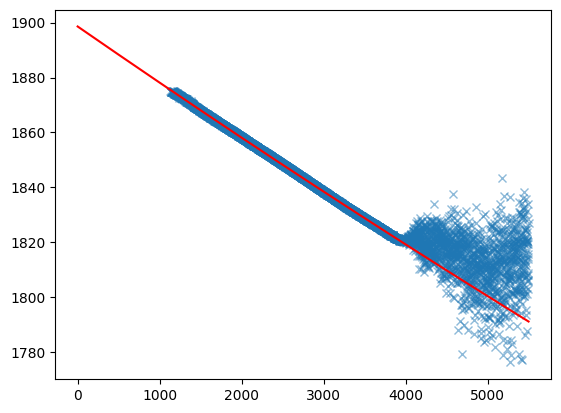

In [71]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');

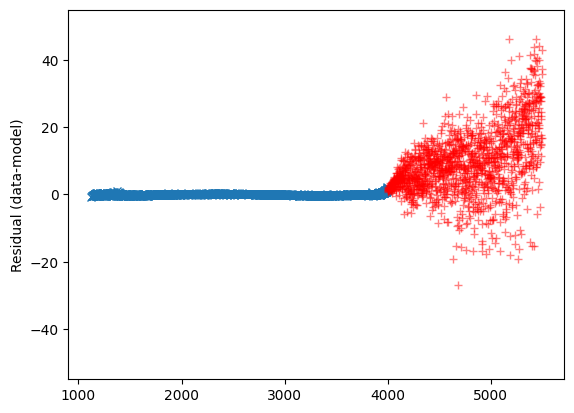

In [72]:

plt.plot(xvals[~bad_moments & (xvals < xhigh)],
        weighted_yaxis_values[~bad_moments & (xvals < xhigh)] - fitted_polymodel(xvals[~bad_moments & (xvals < xhigh)]), 'x')
plt.plot(xvals[~bad_moments & (xvals > xhigh)],
        weighted_yaxis_values[~bad_moments & (xvals > xhigh)] - fitted_polymodel(xvals[~bad_moments & (xvals > xhigh)]), 'r+', alpha=0.5)
plt.ylim(-55, 55)
plt.ylabel("Residual (data-model)");

# Step 4. Obtain a trace profile

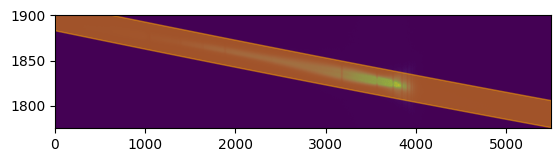

In [73]:

plt.imshow(hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
           origin="lower")
plt.gca().set_aspect(10)
plt.fill_between(xvals, fitted_polymodel(xvals)-15,
                fitted_polymodel(xvals)+15,
                color='orange', alpha=0.5)
plt.axis((0,hdul[0].data.shape[1],ylow,yhigh));

In [74]:
# start by taking +/- 15 pixels
npixels_to_cut = 15
trace_center = fitted_polymodel(xvals)
cutouts = np.array([hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)])
cutouts.shape

(5496, 30)

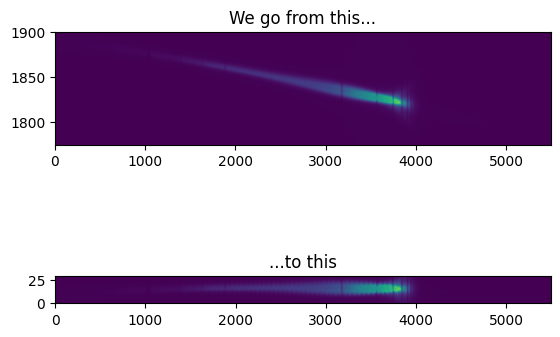

In [75]:
ax1 = plt.subplot(2,1,1)
ax1.imshow(hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
           origin="lower")
ax1.set_aspect(10)
ax1.set_title("We go from this...")
ax2 = plt.subplot(2,1,2)
ax2.imshow(cutouts.T, 
           origin="lower")
ax2.set_title("...to this")
ax2.set_aspect(10)

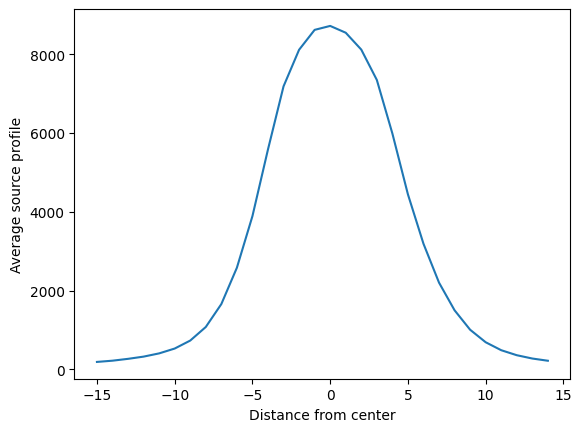

In [76]:
mean_trace_profile = (cutouts - background).mean(axis=0)
trace_profile_xaxis = np.arange(-npixels_to_cut, npixels_to_cut)
plt.plot(trace_profile_xaxis, mean_trace_profile)
plt.xlabel("Distance from center")
plt.ylabel("Average source profile");

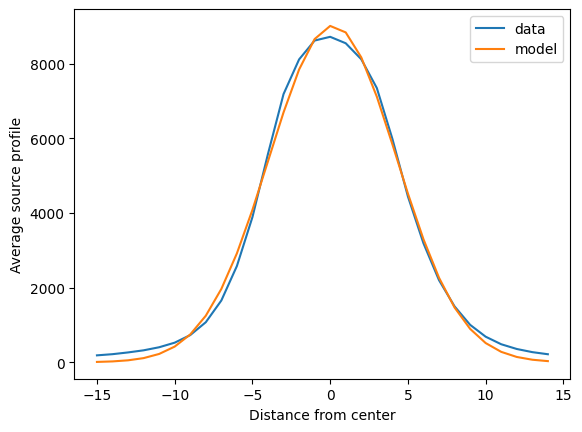

In [77]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=mean_trace_profile.max(), mean=0, stddev=5)
fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=mean_trace_profile)
model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
fitted_trace_profile

plt.plot(trace_profile_xaxis, mean_trace_profile, label='data')
plt.plot(trace_profile_xaxis, model_trace_profile, label='model')
plt.legend(loc='best')
plt.xlabel("Distance from center")
plt.ylabel("Average source profile");

# Step 5. Extract the traced spectrum


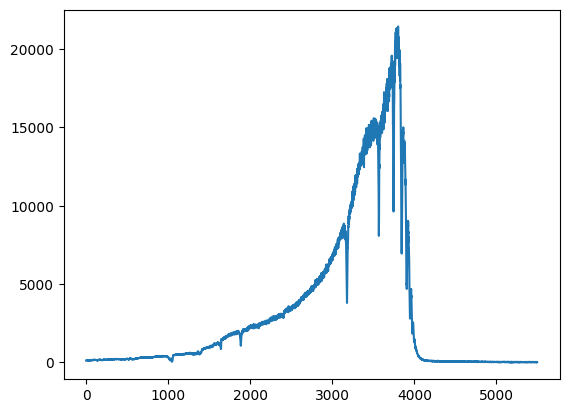

In [78]:
average_spectrum = (cutouts - background).mean(axis=1)
plt.plot(average_spectrum);

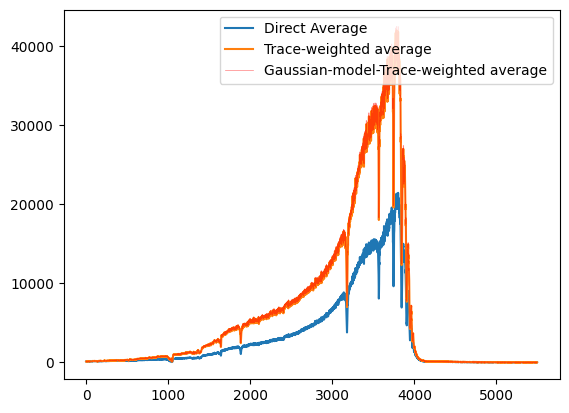

In [79]:
trace_avg_spectrum = np.array([np.average(
    hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
    weights=mean_trace_profile)
                               for yval, ii in zip(trace_center, xvals)])

gaussian_trace_avg_spectrum = np.array([np.average(
    hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
    weights=model_trace_profile)
                               for yval, ii in zip(trace_center, xvals)])


plt.plot(average_spectrum, label="Direct Average")
plt.plot(trace_avg_spectrum, label='Trace-weighted average')
plt.plot(gaussian_trace_avg_spectrum, label='Gaussian-model-Trace-weighted average', alpha=0.5, linewidth=0.5, color='r')
plt.legend(loc='best');

# apply other image

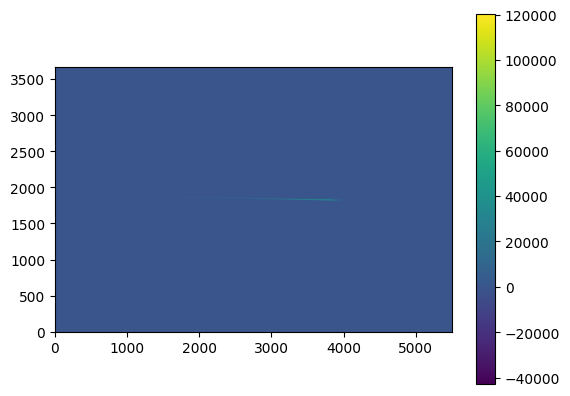

In [80]:
fpath_obj = Path("/mnt/Rdata/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-Cal_LIGHT_-_2024-06-04_-_TEC140_ASI183MMPro_-_1bin")
hdul_obj = fits.open(fpath)

plt.imshow(hdul_obj[0].data,
           origin="lower")
plt.colorbar();

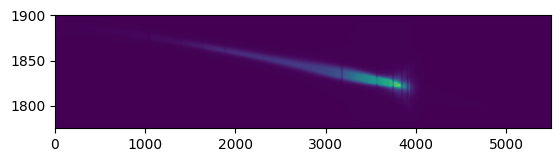

In [81]:
plt.imshow(hdul_obj[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
           origin="lower")
plt.gca().set_aspect(10)

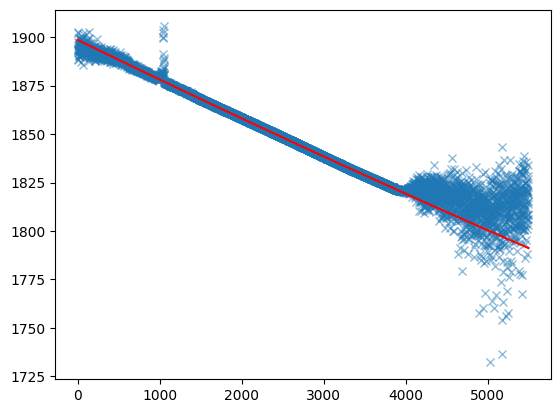

In [82]:
# yaxis2 = np.repeat(np.arange(ylow, yhigh)[:,None], hdul_obj[0].data.shape[1], axis=1)
# weighted_yaxis_values2 = np.average(yaxis2, axis=0, weights=hdul_obj[0].data[ylow:yhigh,:] - np.median(hdul_obj[0].data))
# polymodel2 = Polynomial1D(degree=3)
# fitted_polymodel2 = linfitter(polymodel2, xvals, weighted_yaxis_values2)
# trace_center2 = fitted_polymodel2(xvals)

plt.plot(xvals, weighted_yaxis_values, 'x', alpha=0.5)
plt.plot(xvals, trace_center, color='r');

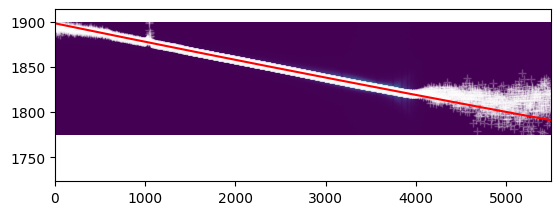

In [83]:
plt.imshow(hdul_obj[0].data[ylow:yhigh,:], extent=[0,hdul_obj[0].data.shape[1],ylow,yhigh],
           origin="lower")
plt.plot(xvals, weighted_yaxis_values, 'w+', alpha=0.25)
plt.plot(xvals, trace_center, color='r')
plt.gca().set_aspect(10)

In [84]:
spectrum2 = np.array([np.average(hdul_obj[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - np.median(hdul_obj[0].data),
                                weights=mean_trace_profile)
                    for yval, ii in zip(trace_center, xvals)])
print("spectrum2 :", spectrum2)

spectrum2 : [123.78635  145.5919   143.38701  ...  33.16849   28.437208  11.774489]


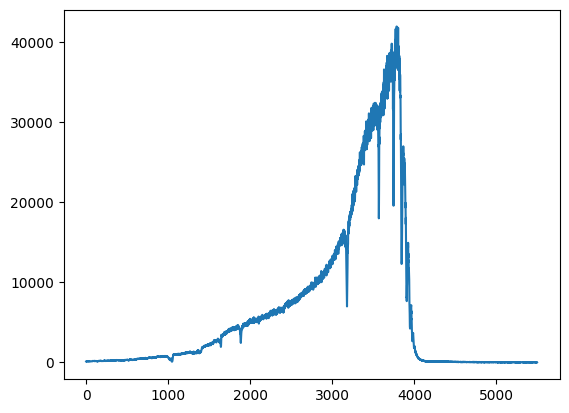

In [85]:
plt.plot(spectrum2);